In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from scripts2.Cross_neutralization.Compute_FR_major import Compute_FR_major
Folder = "Compare_variants/June-2024-MS_Revisions/"
# all lineages to simulate
lin_list = ["Alpha", 
            "Delta", 
            "Omicron(BA.1)", 
           ]#"BA.2"]
# mutations lists must correspond to lin_list
mut_list = [Folder+"Alpha.txt", 
            Folder+"Delta.txt",
            Folder+"BA.1.txt",
            Folder+"BA.2.txt"]

#Compute_FR_major(None, None, "data/epitope_data/dms_per_ab_per_site.csv", None, None, 4, lin_list, mut_list,Folder+"Cross_Sim.pck")

In [3]:
### IC50 and antibody potency computed previously
potency = {"A":0.168746, "B":0.098073,
            "C":0.389699, "D1":0.402943,
            "D2":0.112063, "E12":0.659345,
            "E3":1.605838, "F1":1.970766,
            "F2":0.550316, "F3":0.579354, "NTD":1}
IC50 = 1.52458334405196

import pickle
def PNeut(c, lineage, antigen, cross_dic, var_cross):
    Ab_list = list(cross_dic.keys())
    i1 = var_cross.index(antigen)
    i2 = var_cross.index(lineage)
    
    neut_curve = 1 - np.prod(np.array([1 - c/(c + (cross_dic[ab][i1, i2]*potency[ab]*IC50))for ab in Ab_list]), axis = 0)
    return neut_curve  

In [4]:
import pandas as pd
import numpy as np
"""Neutralization assay data as listed references from 1 to 14 in Miejers supplementary table (Folder+"Neut_assays/1-s2.0-S0092867423010760-mmc2.xlsx")"""
## (1) Bates 2021
Bates2021 = pd.read_excel(Folder+"Neut_assays/Bates2021.xlsx", sheet_name = "Figure 1B", engine='openpyxl')
alpha_bates = list(Bates2021["WA1 (FRNT50)"].to_numpy()/Bates2021["B.1.1.7 (FRNT50)"].to_numpy())
print("(1) GM Bates Alpha", np.prod(alpha_bates)**(1/len(alpha_bates)))

# (2) Cameroni et al. 2022 (Full data available upon Request, but 39(mRNA-1273), 37 (pfizer BNT162b2), 21 (AZD122)  
#FR reported in text (primary infection))
omicron_cameroni = [12, 37]# 12 for Health Care Workers comparison against Wuhan-Hu-1, 37 for all comparison against D614G(only 37 in Meijers)
print("(2) GM Cameroni Omicron Reported", np.prod(omicron_cameroni)**(1/len(omicron_cameroni)))

# (3) Garcia-Beltran et al. 2021 (Full data available upon Request, but 2.1 FR for Alpha reported for Pfizer in text)
alpha_GB = [2.1]
print("(3) GM Garcia-Beltran Alpha", np.prod(alpha_GB)**(1/len(alpha_GB)))

# (4) Liu et al. 2021, Supplementary Table S4 pfizer (B.1.617.2) (Folder+Neut_assays/Liu2021b_BNT662b2.pdf)
Delta_liu = [2.1, 1, 2.7, 0.6, 3., 1.7, 1.0, 6.0,
             6.8, 5.2, 6.2, 1.8, 2.0, 2.3, 2.8, 3.8, 
             2.2, 2.5, 3.0, 3.1, 4.7, 1.8, 4.5, 1.1, 1.9]

print("(4) GM Liu 2021a Delta", np.prod(Delta_liu)**(1/len(Delta_liu)))

# (5) Zhou et al. 2021 Victoria (SARS-CoV-2/human/AUS/VIC01/2020), an early Wuhan-related isolate
# (This study shows Pfizer FR for B.1.351/Beta and not B.1.1.7/Alpha)
print("(5) GM Zhou Alpha: This study shows Pfizer FR for B.1.351/Beta and not B.1.1.7/Alpha)")

# (6) Wang et al. 2021 Fig. 4B (concept of fold change is not clear, some <0 some >0, does not look like the ratios)
### But stated that in text that there was essentially no change pfizer neutralization of variant vs wt (so FR = 1 as stated in Meijers et al)
#alpha_Wang_orig = [1.3, -1.8, 1.1, -1.7, 1.6, 1.7, 2.4, 1.1, 2.3, -1.]
#alpha_Wang = [1.3, 1.1, 1.6, 1.7, 2.4, 1.1, 2.3]
print("(6) GM Want Alpha: concept of fold change is not clear, some <0 some >0, does not look like the ratios")

# (7) Liu et al. 2021, BNT162b2... PRNT_50 assay (Folder+Neut_assays/Liu2021a_data.pdf)
wt = np.array([453, 160, 905, 640, 320, 453, 640, 320, 905, 640, 640, 640, 1280, 320, 320, 320, 640, 640, 640, 640])
alp = np.array([640, 80, 1280, 640, 320, 320, 640, 320, 1280, 640, 640, 1280, 1280, 320, 640, 1280, 640, 640, 640, 640])
alpha_Liu = list(wt/alp)

print("(7) GM Liu 2021b Alpha", np.prod(alpha_Liu)**(1/len(alpha_Liu)))

# (8) Mlcochova, P. et al. 2021, No data table, just the FR values reported in Fig.1d for BNT162b2
alpha_Mlc = [5.8]
Delta_Mlc = [8.4]

print("(8) GM  Mlcochova Alpha", np.prod(alpha_Mlc)**(1/len(alpha_Mlc)))
print("(8) GM  Mlcochova Delta", np.prod(Delta_Mlc)**(1/len(Delta_Mlc)))


# (9) Planas et al data Alpha (B.1.1.7), Delta (B.1.617.2) against D614G week 3 and week 8 after Pfizer vaccine BNT162b2
Planas_W3 = pd.read_excel(Folder + "Neut_assays/41586_2021_3777_MOESM4_ESM.xlsx", sheet_name = "Fig 2b Pfizer W3", engine='openpyxl')
Planas_W8 = pd.read_excel(Folder + "Neut_assays/41586_2021_3777_MOESM4_ESM.xlsx", sheet_name = "Fig 2b Pfizer W8", engine='openpyxl')

alpha_planas = list(Planas_W3["D614G"].to_numpy()/Planas_W3["B.1.1.7"].to_numpy())
alpha_planas += list(Planas_W8["D614G"].to_numpy()/Planas_W8["B.1.1.7"].to_numpy())
alpha_planas = np.array(alpha_planas)
alpha_planas = alpha_planas[~np.isnan(alpha_planas)]

print("(9) GM Planas Alpha", np.prod(alpha_planas)**(1/len(alpha_planas)))

Delta_planas = list(Planas_W3["D614G"].to_numpy()/Planas_W3["B.1.617.2"].to_numpy())
Delta_planas += list(Planas_W8["D614G"].to_numpy()/Planas_W8["B.1.617.2"].to_numpy())
Delta_planas = np.array(Delta_planas)
Delta_planas = Delta_planas[~np.isnan(Delta_planas)]
print("(9) GM Planas Delta", np.prod(Delta_planas)**(1/len(Delta_planas)))


# (10) Planas et al Delta, Omicron data (41586_2021_4389_MOESM5_ESM.xlsx contains subtables instead of sheets, it's faster to copy the numbers)
# 2 Dose Pfizer
rD64Gplanas = np.array([44.67, 118.1, 252.9, 371.2, 701, 679.7, 221, 98.04, 522.2, 106.2, 1283, 914.2, 3140, 1023, 286.2, 150.8])
rDelta_planas2 = np.array([15, 55.62, 74.03, 218.2, 107, 214.8, 15, 37.35, 215.8, 15, 487.3, 347.5, 1323, 336.1, 55.14, 38.94])
rOmicron_planas = np.array([15,15, 15, 15, 15, 15, 15, 15, 15, 15, 61.55, 15, 15, 15, 15, 15])

Delta_planas2 = list(rD64Gplanas/rDelta_planas2)
omicron_planas = list(rD64Gplanas/rOmicron_planas)

print("(10) GM Planas Delta", np.prod(Delta_planas2)**(1/len(Delta_planas2)))
print("(10) GM Planas Omicron", np.prod(omicron_planas)**(1/len(omicron_planas)))

# (11) Muik et al  data Table S1 (Folder+Neut_assays/abg6105_muik_sm.pdf)
pVNT50_Wuhan = np.array([160, 114.1, 223.2, 193, 111.9, 128, 278.1, 203.6, 94.91, 209.7, 
                         50.82, 241.3, 174, 292.5, 186.7, 86.28, 229.8, 951.5, 253.1, 142.9,
                        308.3, 245.7, 241.7, 473.1, 546.8, 174.2, 151.9, 242.8, 442.6, 417.8,
                        188.2, 317.9, 155, 352.1, 257.4, 410.5, 1066, 655, 103, 196])
pVNT50_Alpha = np.array([161.2, 85.75, 128.6, 268.4, 64.26, 99.08, 226.8, 185, 58.4, 126.8,
                  41.66, 486.1, 84.84, 136.7, 121.6, 116.2, 220.8, 1215, 162, 152, 158.9,
                  181.6, 276.9, 262.2, 280.8, 208.3, 136.1, 132.7, 631.1, 243.1, 94.29, 249.1,
                  119.3, 262.4, 157.9, 323.4, 961.1, 1009, 79.05, 160])
alpha_muik = list(pVNT50_Wuhan/pVNT50_Alpha)

print("(11) GM Muik Alpha", np.prod(alpha_muik)**(1/len(alpha_muik)))

# (12) Uriu et al Alpha, Delta against pfizer Table S7 (Folder+Neut_assays/Uriu_nejmc2114706_appendix.pdf)
rParental = np.array([555, 2417, 613, 1186, 361, 206, 368, 595, 256, 448, 715, 854, 1260, 313])
rAlpha = np.array([440, 880, 415, 131, 161, 179, 227, 597, 81, 192, 271, 420, 691, 1407])
rDelta = np.array([84, 623, 260, 239, 151, 149, 96, 520, 224, 218, 239, 349, 265, 511])
alpha_Uriu = rParental/rAlpha
Delta_Uriu = rParental/rDelta

print("(12) GM Uriu alpha", np.prod(alpha_Uriu)**(1/len(alpha_Uriu)))
print("(12) GM Uriu Delta", np.prod(Delta_Uriu)**(1/len(Delta_Uriu)))

# (13) Rössler Omicron Delta against Pfizer 
print("(13) No IC50 data provided as table anywhere")

# (14) Gruel et al Alpha Delta Omicron Only Omicron data in Supplementary Table S2 (Folder+Neut_assays/Gruel_41591_2021_1676_MOESM1_ESM.pdf)
# Taking early Serum ID50
rWu01 = np.array([41, 37, 293, 242, 264, 1749, 689, 588, 254, 1478, 
                 1342, 726, 963, 3336, 1006, 521, 823, 1128, 1008, 1334,
                 695, 1600, 294, 311, 474, 551, 831, 408, 270, 352])

# some data are <10 and we fix them at 10
rOmicron = np.array([10, 10, 10, 10, 10, 12, 10, 10, 10, 28, 33, 10, 35, 114,
                    15, 10, 10, 10, 10, 10, 10, 49, 10, 23, 10, 10, 10, 10, 10, 10])

omicron_gruel = list(rWu01/rOmicron)

print("(14) GM Gruel Omicron", np.prod(omicron_gruel)**(1/len(omicron_gruel)))

### Combine all data
alpha_data = list(alpha_bates) 
alpha_data += alpha_GB + alpha_Liu
alpha_data += alpha_Mlc
alpha_data +=list(alpha_planas)
alpha_data += list(alpha_muik)
alpha_data +=list(alpha_Uriu)

Delta_data = Delta_liu + Delta_Mlc
Delta_data += list(Delta_planas)
Delta_data += Delta_planas2
Delta_data += list(Delta_Uriu)

omicron_data = omicron_cameroni
omicron_data += omicron_planas
omicron_data += omicron_gruel

FR_dic = {"Alpha":alpha_data, 
          "Omicron(BA.1)":omicron_data,
          "Delta": Delta_data}


(1) GM Bates Alpha 2.6344949179296044
(2) GM Cameroni Omicron Reported 21.071307505705477
(3) GM Garcia-Beltran Alpha 2.1
(4) GM Liu 2021a Delta 2.491817651153046
(5) GM Zhou Alpha: This study shows Pfizer FR for B.1.351/Beta and not B.1.1.7/Alpha)
(6) GM Want Alpha: concept of fold change is not clear, some <0 some >0, does not look like the ratios
(7) GM Liu 2021b Alpha 0.8706281081225461
(8) GM  Mlcochova Alpha 5.8
(8) GM  Mlcochova Delta 8.4
(9) GM Planas Alpha 1.36547327851092
(9) GM Planas Delta 2.929909058489485
(10) GM Planas Delta 3.500252190478168
(10) GM Planas Omicron 21.23599575698129
(11) GM Muik Alpha 1.2539535824639108
(12) GM Uriu alpha 1.7757483765653999
(12) GM Uriu Delta 2.40589753881516
(13) No IC50 data provided as table anywhere
(14) GM Gruel Omicron 40.57556800215432


Alpha GEOMean FR data 1.6097734048098595 our estimate 3.7811889590480554
Delta GEOMean FR data 2.8346526986582186 our estimate 3.9100331234576564
Omicron(BA.1) GEOMean FR data 31.818282631562784 our estimate 15.326998569841171


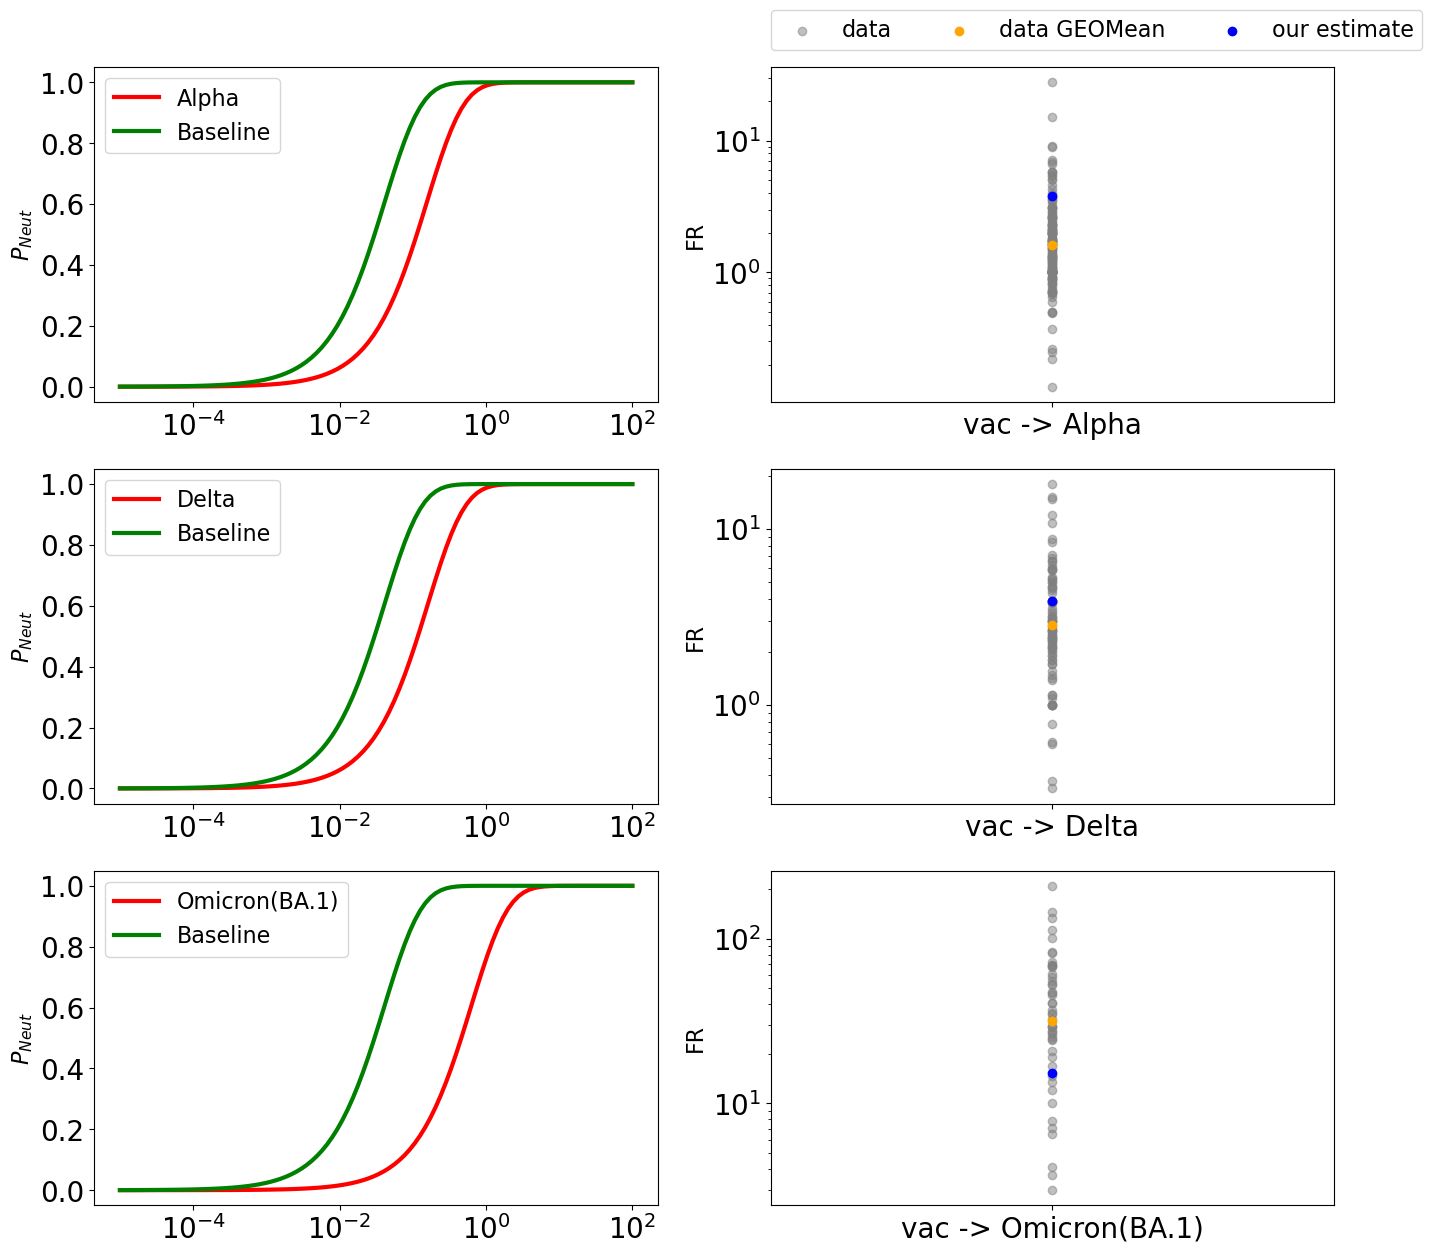

In [5]:
import matplotlib
from matplotlib import pyplot as plt
def PreFig(xsize =12, ysize = 12):
    '''
    @brief: customize figure parameters
    '''
    matplotlib.rc('xtick', labelsize=xsize) 
    matplotlib.rc('ytick', labelsize=ysize)

from scipy.optimize import root
def func(c, prop, lineage, antigen, cross_dic, var_cross):
    return PNeut(c, lineage, antigen, cross_dic, var_cross) - prop

def find_conc(prop, lineage, antigen, cross_dic, var_cross):
    conc_prop = root(func, 0, args = (prop, lineage, antigen, cross_dic, var_cross), method = "lm")
    return conc_prop.x

file1 = open(Folder+"Cross_Sim.pck", "rb")
cross_dic = pickle.load(file1)
var_cross = list(cross_dic["variant_list"])
cross_dic.pop("variant_list")
try:
    cross_dic.pop("Mutations")
except:
    pass
file1.close()

from scipy.stats import mstats
# Neut Assays corresponding to lineages
import pdb

PreFig(xsize = 20, ysize =20)
fig = plt.figure(figsize=(16,20))
c = np.logspace(-5, 2, 100)
s = 1
for l in range(len(lin_list)): 
    lineage = lin_list[l]
    ax = fig.add_subplot(4,2,s)
    neut_curve = PNeut(c, lineage, "Wuhan-Hu-1", cross_dic, var_cross)
    neut_curve0 = PNeut(c, "Wuhan-Hu-1", "Wuhan-Hu-1", cross_dic, var_cross)
    #plt.plot(c, neut_curve, linewidth = 3, color = "red", label = lineage)
    plt.semilogx(c, neut_curve, linewidth = 3, color = "red", label = lineage)
    plt.semilogx(c, neut_curve0, linewidth = 3, color = "green", label = "Baseline")
    
    c_prop0 =  find_conc(0.50, "Wuhan-Hu-1", "Wuhan-Hu-1", cross_dic, var_cross)
    c_prop1 = find_conc(0.50, lineage, "Wuhan-Hu-1", cross_dic, var_cross)
    FR = c_prop1/c_prop0
    #plt.title("FR = %.2f"%FR)
    if s>6:
        plt.xlabel("concentration", fontsize = 16)
    plt.ylabel("$P_{Neut}$", fontsize = 16)
    plt.legend(fontsize = 16)
    
    ax2 = fig.add_subplot(4, 2, s+1)
    FRdata = FR_dic[lineage]
    gM = (np.prod(FRdata))**(1/len(FRdata))
    plt.scatter(np.ones(len(FRdata)), FRdata, marker = "o", color = "grey", label = "data", alpha = 0.5)
    plt.scatter([1], [gM], marker = "o", color = "orange", label = "data GEOMean")
    print(lineage, "GEOMean FR data", gM, "our estimate", FR[0])
    plt.scatter([1], FR, marker = "o", color = "blue", label = "our estimate")
    plt.ylabel("FR", fontsize = 16)
    ax2.set_xticks([1])
    ax2.set_xticklabels(["vac -> %s"%lineage])
    ax2.set_yscale("log")
    if s == 1:
        plt.legend(fontsize = 16, ncols = 3, loc = (0, 1.05))
    s +=2
plt.show()

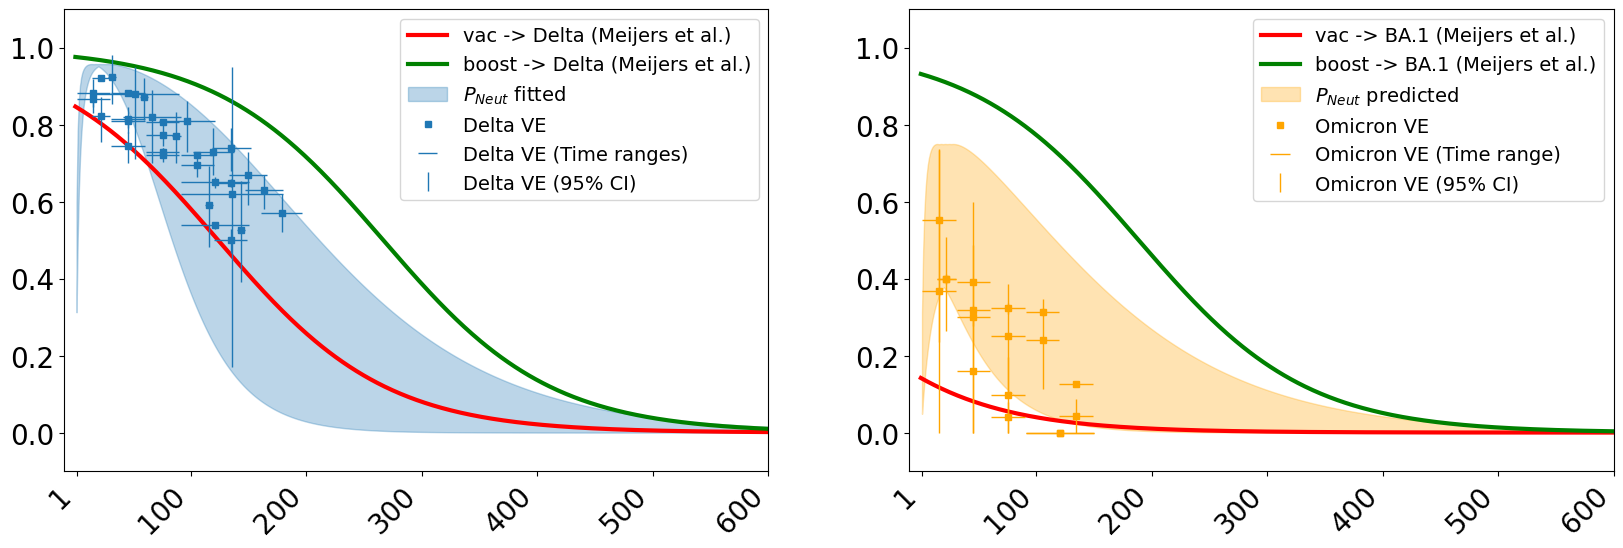

In [6]:
### Meijers Cross-Immunity estimates vs Vaccine Efficacy data
lbd = 0.9
T50 = 4.2
tau = 65

def H(Tik, delta_t, T50, lbd):
    Tik_t = Tik - delta_t/tau
    res = 1./(1 + np.exp(-lbd*(Tik_t-T50)))
    return res
              

delta_t = np.linspace(0, 600, 600)             
PreFig(xsize = 20, ysize =20)
fig = plt.figure(figsize=(20,6))
              
ax = fig.add_subplot(1,2,1)         
Tik_list1 = [6.1, 8.3]
lab1 = ["vac -> Delta (Meijers et al.)", "boost -> Delta (Meijers et al.)"]
col = ["red", "green"]  
for i in range(len(Tik_list1)):
    Tik = Tik_list1[i]
    res = H(Tik, delta_t, T50, lbd)
    plt.plot(delta_t, res, linewidth = 3, color = col[i], label = lab1[i])

# Our PNeut
### Load Data already pre-made #####
Pneut_Delta_df = pd.read_csv('data/PNeut_Delta_validation.csv')
Pneut_Delta_df.drop(columns = "Unnamed: 0", inplace = True)
delt_t = Pneut_Delta_df["Day since infection"]
"""Add PNeut Envelope Delta """
col_d = "#1f77b4"
EnvD_Min, EnvD_Max = Pneut_Delta_df["Proba Neut Min"], Pneut_Delta_df["Proba Neut Max"]
plt.fill_between(delt_t, EnvD_Min, EnvD_Max, alpha = 0.3, color = col_d, label = "$P_{Neut}$ fitted")

# VE Delta
VE_Delta_df = pd.read_csv('data/Processed_Clinical_Delta_VE.csv')
VE_Delta_df.drop(columns = "Unnamed: 0", inplace = True)

All_Days_Delta = VE_Delta_df["Day since vacc (data)"].values
All_Delta_Data = VE_Delta_df["Processed VE"].values
All_Days_xerr_Delta = VE_Delta_df["Days Err (+/-)"].values
All_Delta_yerr = np.zeros((2, len(All_Days_Delta)))
All_Delta_yerr[0, :] = VE_Delta_df["VE errorbar (min)"].values
All_Delta_yerr[1, :] = VE_Delta_df["VE errorbar (max)"].values

### this is always equal to All_Days_Delta, All_Delta_Data, but used for clarity
ve_fitted = VE_Delta_df["Processed VE (used in IC50 fitting)"].values
days_fitted = VE_Delta_df["Day since vacc (used in IC50 fitting)"].values

elw = 1
ms = 5
fs = "full"
plt.plot(days_fitted, ve_fitted, "s", 
         markersize = ms, color = col_d, fillstyle = fs, 
         label = "Delta VE")

plt.errorbar(All_Days_Delta, All_Delta_Data, yerr = None, 
             xerr = All_Days_xerr_Delta, elinewidth=elw, 
             linestyle = "", ecolor = col_d, 
             label= "Delta VE (Time ranges)")

plt.errorbar(All_Days_Delta, All_Delta_Data, yerr = All_Delta_yerr, 
             xerr = None, elinewidth=elw, linestyle = "", 
             ecolor = col_d, 
             label = "Delta VE (95% CI)")

#ax.set_aspect(1.0/(2*ax.get_data_ratio()), adjustable='box')

ax.set_ylim((-0.1, 1.1))
ax.set_xticks([1, 100, 200, 300, 400, 500, 600])
ax.set_xticklabels([1, 100, 200, 300, 400, 500, 600], rotation = 45, horizontalalignment = "right")
ax.set_xlim((-10, 600))

plt.legend(fontsize = 14)
ax = fig.add_subplot(1,2,2)
Tik_list2 = [2.2, 7.1]
lab2 = ["vac -> BA.1 (Meijers et al.)", "boost -> BA.1 (Meijers et al.)"]
col = ["red", "green"]  
for i in range(len(Tik_list2)):
    Tik = Tik_list2[i]
    res = H(Tik, delta_t, T50, lbd)
    plt.plot(delta_t, res, linewidth = 3, color = col[i], label = lab2[i])

# Our PNeut
### Load P_Neut Data already pre-made ####
Pneut_Omicron_df = pd.read_csv('data/PNeut_Omicron_validation.csv')
Pneut_Omicron_df.drop(columns = "Unnamed: 0", inplace = True)
om_t = Pneut_Omicron_df["Day since infection"]
"""Add PNeut Envelope Omicron validation"""
col_o = "orange"
EnvO_Min, EnvO_Max = Pneut_Omicron_df["Proba Neut Min"], Pneut_Omicron_df["Proba Neut Max"]
plt.fill_between(delt_t, EnvO_Min, EnvO_Max, alpha = 0.3, color = col_o, label = "$P_{Neut}$ predicted")

### VE Omicron BA.1
VE_Omicron_df = pd.read_csv('data/Processed_Clinical_Omicron_VE.csv')
VE_Omicron_df.drop(columns = "Unnamed: 0", inplace = True)

All_Days_Omicron = VE_Omicron_df["Day since vacc (data)"].values
All_Omicron_Data = VE_Omicron_df["Processed VE"].values
All_Days_xerr_Omicron = VE_Omicron_df["Days Err (+/-)"].values
All_Omicron_yerr = np.zeros((2, len(All_Days_Omicron)))
All_Omicron_yerr[0, :] = VE_Omicron_df["VE errorbar (min)"]
All_Omicron_yerr[1, :] = VE_Omicron_df["VE errorbar (max)"]

elw = 1
plt.errorbar(All_Days_Omicron, All_Omicron_Data, yerr = None, 
             xerr = All_Days_xerr_Omicron, elinewidth=elw, 
             linestyle = "", ecolor = col_o, 
             label= "Omicron VE (Time range)")

ms = 5
fs = "full"
plt.plot(All_Days_Omicron, All_Omicron_Data, "s", 
         markersize = ms, color = col_o, fillstyle = fs, 
         label = "Omicron VE")

plt.errorbar(All_Days_Omicron, All_Omicron_Data, yerr = All_Omicron_yerr, 
             xerr = None, elinewidth=elw, 
             linestyle = "", ecolor = "orange", 
             label = "Omicron VE (95% CI)")

#ax.set_aspect(1.0/(2*ax.get_data_ratio()), adjustable='box')

ax.set_ylim((-0.1, 1.1))
ax.set_xticks([1, 100, 200, 300, 400, 500, 600])
ax.set_xticklabels([1, 100, 200, 300, 400, 500, 600], rotation = 45, horizontalalignment = "right")
ax.set_xlim((-10, 600))

plt.legend(fontsize = 14)

plt.show()
fig.savefig(Folder+"PNeut_vs_Meijers.svg")
fig.savefig(Folder+"PNeut_vs_Meijers.png")